In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")

# Data Loading 

[Ref] https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
_data = load_iris()
data = _data["data"]
feature_names = _data["feature_names"]

df = pd.DataFrame(data, columns=feature_names)
df["target"] = _data["target"]

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preprocessing

In [3]:
# Redefine target labels
target_mapping = {
    0: "Iris-Setosa",
    1: "Iris-Versicolour",
    2: "Iris-Virginica",
}
df["target"] = df["target"].map(target_mapping)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa


In [4]:
df["target"].unique()

array(['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], dtype=object)

# EDA

In [ ]:
df.groupby("target").describe()

sepal length (cm)                                         \
                             count   mean       std  min    25%  50%  75%   
target                                                                      
Iris-Setosa                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-Versicolour              50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-Virginica                50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                      sepal width (cm)                                    \
                  max            count   mean       std  min    25%  50%   
target                                                                     
Iris-Setosa       5.8             50.0  3.428  0.379064  2.3  3.200  3.4   
Iris-Versicolour  7.0             50.0  2.770  0.313798  2.0  2.525  2.8   
Iris-Virginica    7.9             50.0  2.974  0.322497  2.2  2.800  3.0   

                             petal length (cm)                             \
                    75%  max             count   mean       std  min  25%   
target                                                                      
Iris-Setosa       3.675  4.4              50.0  1.462  0.173664  1.0  1.4   
Iris-Versicolour  3.000  3.4              50.0  4.260  0.469911  3.0  4.0   
Iris-Virginica    3.175  3.8              50.0  5.552  0.551895  4.5  5.1   

                                   petal width (cm)                        \
                   50%    75%  max            count   mean       std  min   
target                                                                      
Iris-Setosa       1.50  1.575  1.9             50.0  0.246  0.105386  0.1   
Iris-Versicolour  4.35  4.600  5.1             50.0  1.326  0.197753  1.0   
Iris-Virginica    5.55  5.875  6.9             50.0  2.026  0.274650  1.4   

                                      
                  25%  50%  75%  max  
target                                
Iris-Setosa       0.2  0.2  0.3  0.6  
Iris-Versicolour  1.2  1.3  1.5  1.8  
Iris-Virginica    1.8  2.0  2.3  2.5

<Axes: xlabel='target', ylabel='petal length (cm)'>

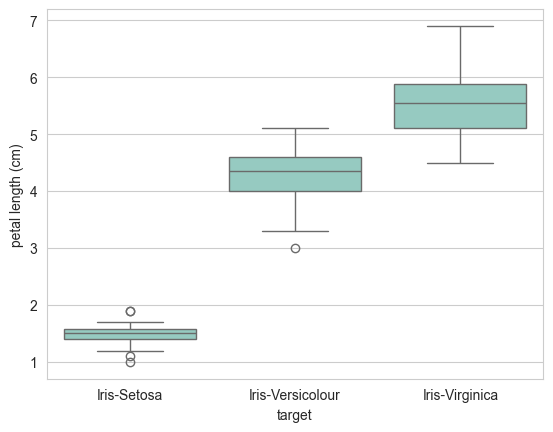

In [6]:
sns.boxplot(
    x="target",
    y="petal length (cm)",
    data=df,
)

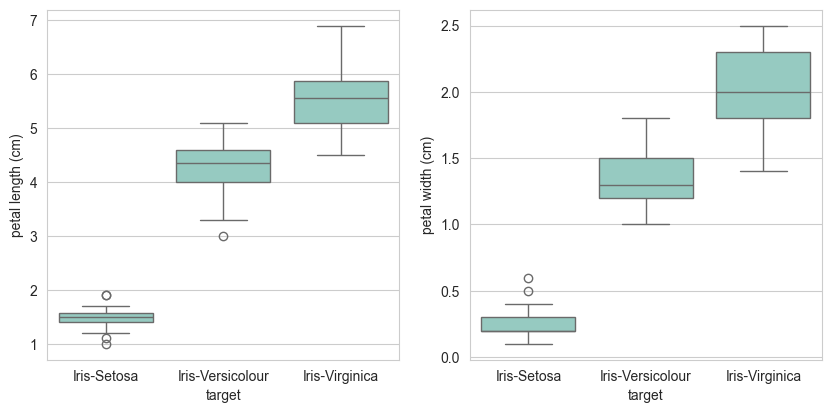

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
sns.boxplot(x="target", y="petal length (cm)", data=df)

plt.subplot(222)
sns.boxplot(x="target", y="petal width (cm)", data=df)

plt.show()

## Standard Scaler

(가정) 데이터셋의 컬럼별로 각각 단위가 다르고, Target 범주별 값의 분포 차이가 상이함

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
_df_scaled = scaler.fit_transform(df)

ValueError: could not convert string to float: 'Iris-Setosa'

In [10]:
_df = df.iloc[:, :-1]
_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
_df_scaled = scaler.fit_transform(_df)
df_scaled = pd.DataFrame(_df_scaled, columns=_df.columns)
df_scaled["target"] = df["target"]

df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,Iris-Setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,Iris-Setosa
2,-1.385353,0.328414,-1.397064,-1.315444,Iris-Setosa
3,-1.506521,0.098217,-1.283389,-1.315444,Iris-Setosa
4,-1.021849,1.249201,-1.340227,-1.315444,Iris-Setosa


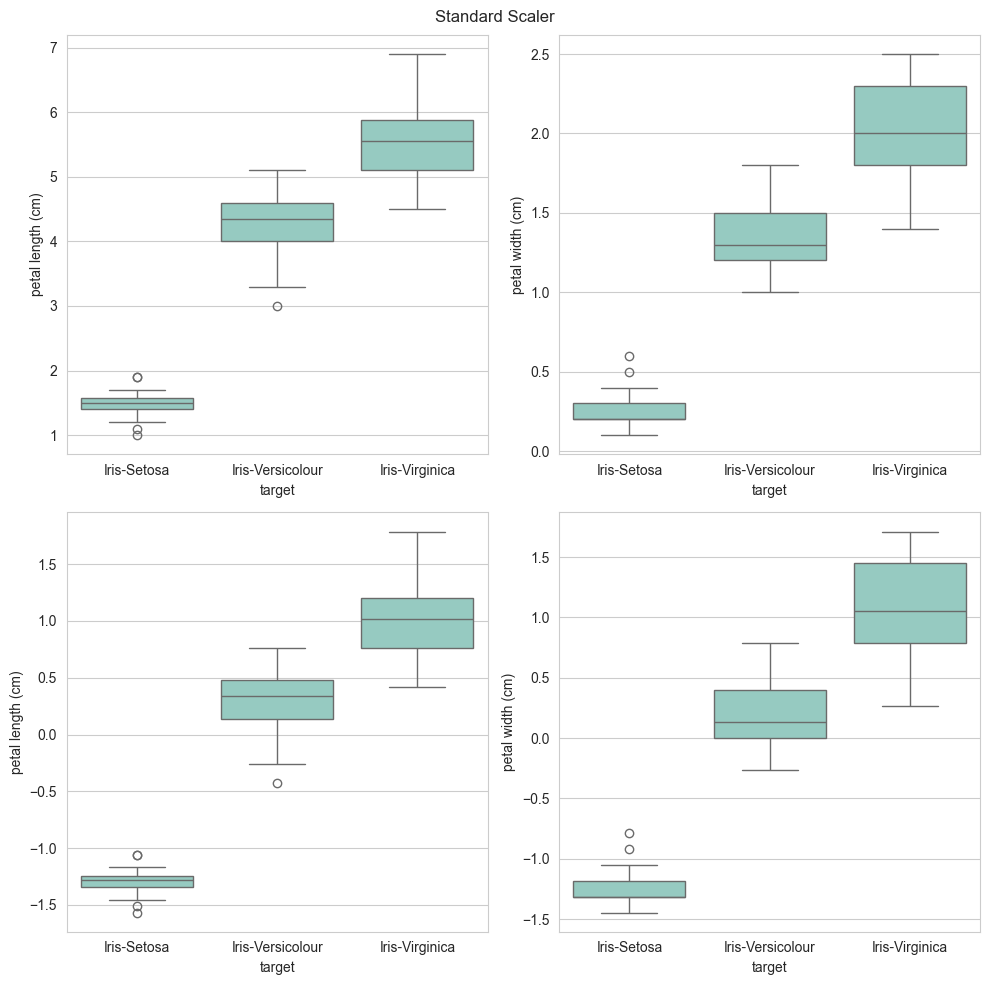

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Standard Scaler")

sns.boxplot(x="target", y="petal length (cm)", data=df, ax=axes[0, 0])
sns.boxplot(x="target", y="petal width (cm)", data=df, ax=axes[0, 1])
sns.boxplot(x="target", y="petal length (cm)", data=df_scaled, ax=axes[1, 0])
sns.boxplot(x="target", y="petal width (cm)", data=df_scaled, ax=axes[1, 1])

plt.tight_layout()
plt.show()

## Min-Max Scaler

- (가정) 데이터셋의 컬럼별로 각각 단위가 다르고, Target 범주별 값의 분포 차이가 상이함

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
_df_scaled = scaler.fit_transform(_df)
df_scaled = pd.DataFrame(_df_scaled, columns=_df.columns)
df_scaled["target"] = df["target"]

df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,Iris-Setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-Setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-Setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-Setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-Setosa


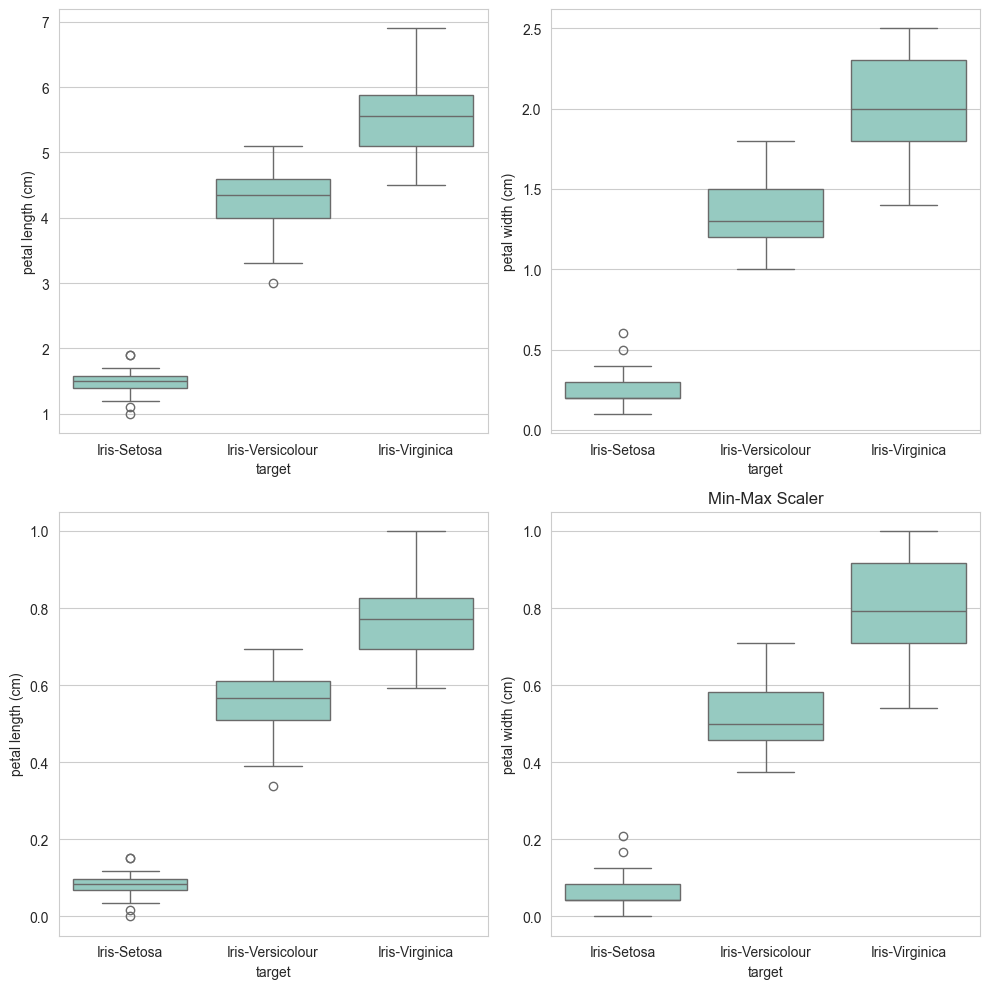

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.title("Min-Max Scaler")

sns.boxplot(x="target", y="petal length (cm)", data=df, ax=axes[0, 0])
sns.boxplot(x="target", y="petal width (cm)", data=df, ax=axes[0, 1])
sns.boxplot(x="target", y="petal length (cm)", data=df_scaled, ax=axes[1, 0])
sns.boxplot(x="target", y="petal width (cm)", data=df_scaled, ax=axes[1, 1])

plt.tight_layout()
plt.show()

# End of Documents